additional set-up to run fast ai in Google Colab

In [1]:
!pip install http://download.pytorch.org/whl/cu75/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl  && pip install torchvision
  
!pip install Pillow==4.0.0
!pip install PIL
!pip install image  
!pip install fastai
!apt update && apt install -y libsm6 libxext6

    100% |████████████████████████████████| 397.4MB 35.9MB/s 
    100% |████████████████████████████████| 61kB 2.3MB/s 
    100% |████████████████████████████████| 2.0MB 7.7MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0
    100% |████████████████████████████████| 5.6MB 4.7MB/s 
torchvision 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
  Found existing installation: Pillow 5.2.0
    Uninstalling Pillow-5.2.0:
      Successfully uninstalled Pillow-5.2.0
  Could not find a version that satisfies the requirement PIL (from versions: )
No matching distribution found for PIL
    100% |████████████████████████████████| 7.3MB 3.2MB/s 
    100% |████████████████████████████████| 122kB 3.7MB/s 
    100% |████████████████████████████████| 51kB 6.3MB/s 
    100% |████████████████████████████████| 2.2MB 7.0MB/s 
    100% |████████████████████████████████| 112kB 17.5MB/s 
    100% 

**Introduction:**
This is based on Fast AI library Lesson 1( Dogs Vs Cats) using resnet 34 pre-trained model with help from A Beginner's Approach to Classification by archaeocharlie & MNIST test with fastai library


Authenticate the Google Drive

In [0]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import os
import pandas as pd

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
listed = drive.ListFile({'q': "title contains 'train_LbELtWX.zip' and '1CllSQ3HVl959S5mTTa24OOtKL01RFIW7' in parents"}).GetList()
for file in listed:
  print('title {}, id {}'.format(file['title'], file['id']))
  


title train_LbELtWX.zip, id 1EPhQ4S-8i7yOeonMnaQjtGPLAcV0BBRN


In [5]:
listed = drive.ListFile({'q': "title contains 'test_ScVgIM0.zip' and '1CllSQ3HVl959S5mTTa24OOtKL01RFIW7' in parents"}).GetList()
for file in listed:
  print('title {}, id {}'.format(file['title'], file['id']))

title test_ScVgIM0.zip, id 1cp8smdrMGkj6EIJGm4NU2zny6H2Q98Ap


In [0]:
download_path = os.path.expanduser('/data')
try:
  os.makedirs(download_path)
except FileExistsError:
  pass

output_file = os.path.join(download_path, 'train_LbELtWX.zip')

temp_file = drive.CreateFile({'id': '1EPhQ4S-8i7yOeonMnaQjtGPLAcV0BBRN'})
temp_file.GetContentFile(output_file)

In [0]:
download_path = os.path.expanduser('/data')
try:
  os.makedirs(download_path)
except FileExistsError:
  pass

output_file = os.path.join(download_path, 'test_ScVgIM0.zip')

temp_file = drive.CreateFile({'id': '1cp8smdrMGkj6EIJGm4NU2zny6H2Q98Ap'})
temp_file.GetContentFile(output_file)

In [8]:
cd /data

/data


In [9]:


!unzip train_LbELtWX.zip -d /data
!unzip test_ScVgIM0.zip -d /data

Archive:  train_LbELtWX.zip
   creating: /data/train/
 extracting: /data/train/3751.png    
 extracting: /data/train/1986.png    
 extracting: /data/train/46774.png   
 extracting: /data/train/1386.png    
 extracting: /data/train/11162.png   
 extracting: /data/train/52576.png   
 extracting: /data/train/24590.png   
 extracting: /data/train/780.png     
 extracting: /data/train/46235.png   
 extracting: /data/train/22625.png   
 extracting: /data/train/48961.png   
 extracting: /data/train/51857.png   
 extracting: /data/train/15658.png   
 extracting: /data/train/6660.png    
 extracting: /data/train/46576.png   
 extracting: /data/train/23201.png   
 extracting: /data/train/26622.png   
 extracting: /data/train/16475.png   
 extracting: /data/train/50593.png   
 extracting: /data/train/8611.png    
 extracting: /data/train/2259.png    
 extracting: /data/train/23122.png   
 extracting: /data/train/20565.png   
 extracting: /data/train/59996.png   
 extracting: /data/train/16779.png

In [0]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
# This file contains all the main external libs we'll use
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [14]:
#set the path
PATH="../data/"
os.listdir(PATH)

['train_LbELtWX.zip',
 'train',
 'test.csv',
 'test_ScVgIM0.zip',
 'train.csv',
 'test']

Get a validation set using ' val_idxs' i.e. 20% of training set in this case

In [0]:
label_csv = f'{PATH}train.csv'
n = len(list(open(label_csv)))-1
val_idxs = get_cv_idxs(n)

In [0]:
label_df=pd.read_csv(f'{PATH}train.csv')

In [0]:
test=pd.read_csv(f'{PATH}test.csv')

In [31]:
label_df.pivot_table(index='label', aggfunc=len).sort_values('id', ascending=False)

,id
label,
0,6000
1,6000
2,6000
3,6000
4,6000
5,6000
6,6000
7,6000
8,6000


To view images

In [75]:
files=!ls {PATH}train/ | head
files[1]

'10001.png'

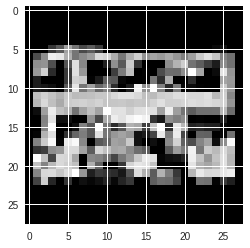

In [112]:
img=plt.imread(f'{PATH}train/{files[1]}')
plt.imshow(img)

In [0]:
sz=128
arch=resnet34
bs=28



In [106]:
img.size

3136

In [0]:
#tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
tfms=tfms_from_model(arch, sz, max_zoom=1.1)
data = ImageClassifierData.from_csv(PATH, 'train', f'{PATH}train.csv', test_name='test',
                                    val_idxs=val_idxs, suffix='.png', tfms=tfms, bs=bs, num_workers=8)


In [115]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

100%|██████████| 358/358 [12:40<00:00,  2.13s/it]


In [116]:
learn.lr_find()

 76%|███████▌  | 1296/1715 [00:27<00:08, 47.02it/s, loss=2.65]

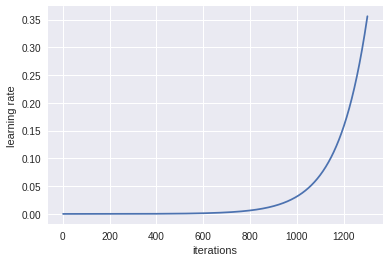

In [110]:
learn.sched.plot_lr()

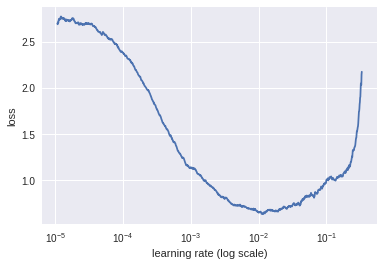

In [117]:
learn.sched.plot()

In [118]:
learn.fit(1e-3, 15)

epoch      trn_loss   val_loss   accuracy   
    0      0.550554   0.411665   0.854583  
    1      0.489577   0.391703   0.863333  
    2      0.510478   0.374295   0.869333  
    3      0.446839   0.355041   0.875167  
    4      0.443271   0.366299   0.875417  
    5      0.416158   0.347469   0.878583  
    6      0.408446   0.338761   0.881     
    7      0.399409   0.334478   0.882333  
    8      0.385779   0.336404   0.882333  
    9      0.403227   0.33555    0.884083  
    10     0.369993   0.325147   0.884667  
    11     0.402649   0.329592   0.88475   
    12     0.379208   0.321935   0.888167  
    13     0.37172    0.325035   0.888583  
    14     0.350775   0.32084    0.885917  


[array([0.32084]), 0.8859166666666667]

Cycle Mult multiplies the length of the cycle after each cycle. e.g. epoch=5, cycle_mult=2 then it multiples the length of the cycle after each cycle (1 epoch + 2 epoch + 4 epoch + 8 epoch+16 epochs=31 epochs)

In [0]:
learn.save('15_epochs')

In [120]:
#predict the test set
%time log_preds_test, y_test=learn.TTA(is_test=True)
probs_test=np.mean(np.exp(log_preds_test),0)
probs_test.shape



CPU times: user 12.7 s, sys: 6.55 s, total: 19.3 s
Wall time: 11.9 s


(10000, 10)

To create a submission file

In [0]:
#Create a dataframe from all probabilities
df=pd.DataFrame(probs_test)
df.columns=data.classes

In [145]:

df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.000058,0.998618,0.000022,0.001011,0.000037,0.000065,0.000132,0.000019,0.000007,0.000032
1,0.001648,0.000107,0.016876,0.007838,0.890454,0.000061,0.082863,0.000047,0.000085,0.000020
2,0.000449,0.000453,0.013337,0.003241,0.977545,0.000004,0.004830,0.000025,0.000034,0.000083
3,0.312860,0.000389,0.045841,0.566242,0.018404,0.000107,0.052747,0.000080,0.003274,0.000055
4,0.060846,0.010141,0.001541,0.876271,0.014573,0.000002,0.036529,0.000009,0.000049,0.000038


In [0]:
#consider the maxm probability

df=df.assign(label=df.values.argmax(axis=1))
#df=df.assign(id=df.index.values+1)

In [0]:
df.insert(0, "id", [e[5:-4] for e in data.test_ds.fnames])

In [0]:
df1=df[['id', 'label']]

In [154]:
df1.head(10)

,id,label
0,65092,1
1,60922,4
2,67450,4
3,64753,3
4,61827,3
5,66848,0
6,63981,2
7,69925,3
8,69920,8
9,66450,5


In [157]:
df1.shape

(10000, 2)

In [0]:
df1.to_csv("submission.csv", index=False)

In [0]:
from google.colab import files
#files.download('')

In [0]:
files.download('submission.csv')